In [1]:
import numpy as np
import matplotlib.pyplot as pp
%matplotlib inline

# 5.1

I'm guessing you want 40*4 models, otherwise the exercise text doesn't make sense to me.
please make the exercise texts clearer in regards to what the exercise is, I've spent way too much time trying to figure what you wanted us to do with the samples and models.

(4, 40, 51) predictions
(4, 51) avg_predictions
(4, 51) variance


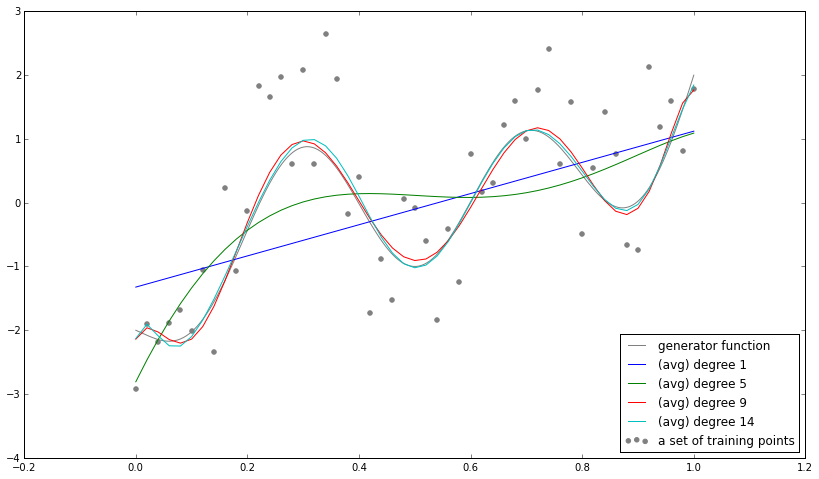

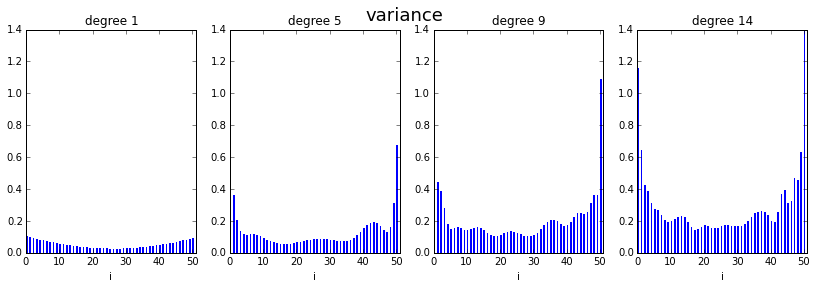

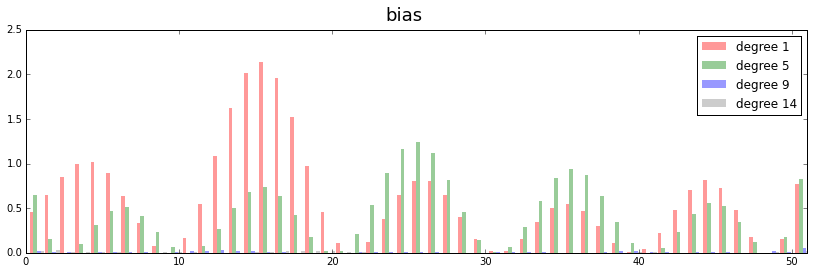

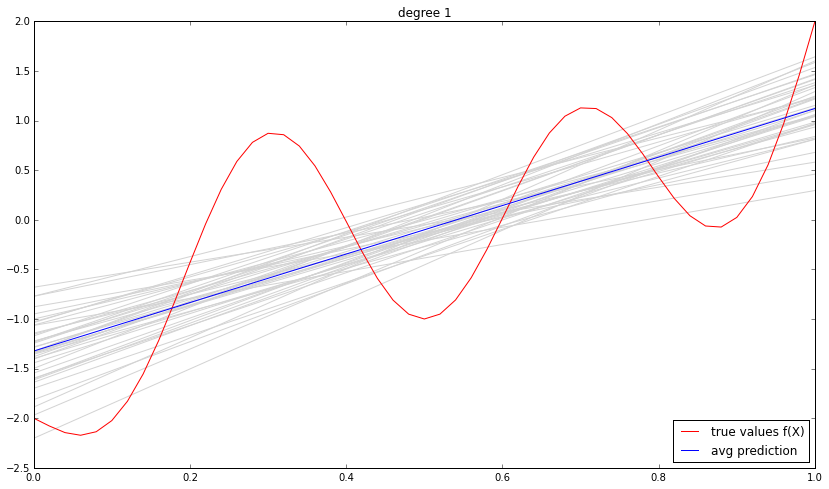

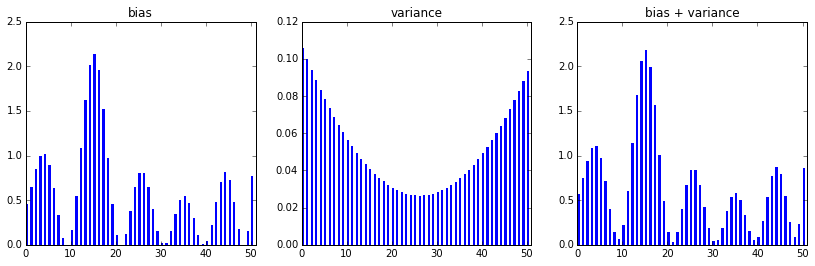

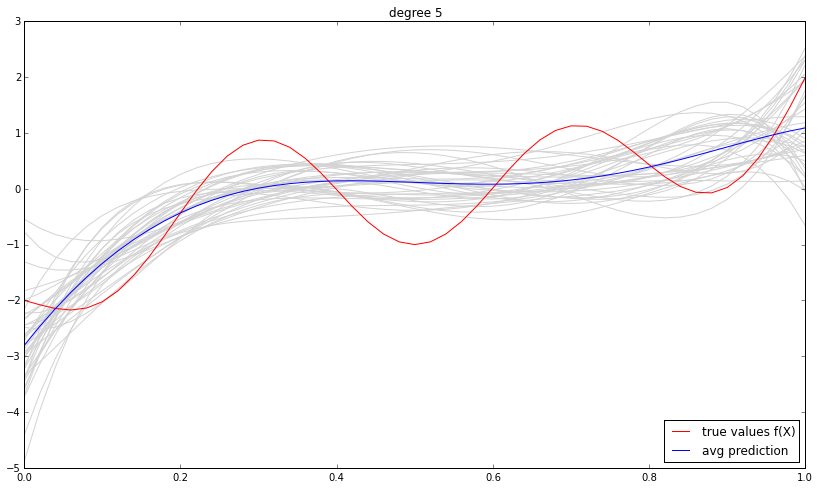

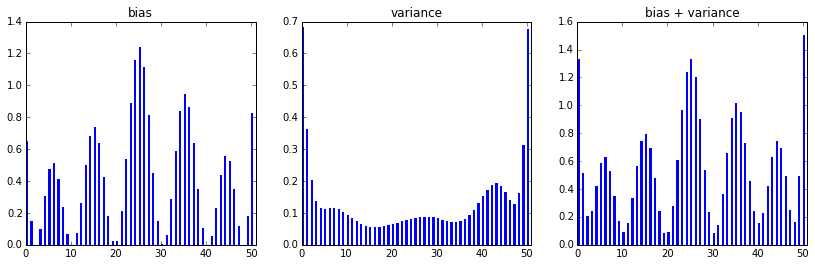

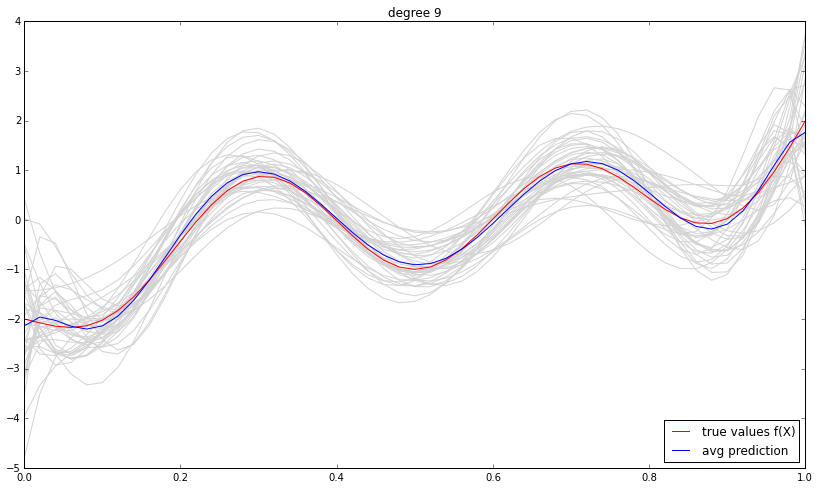

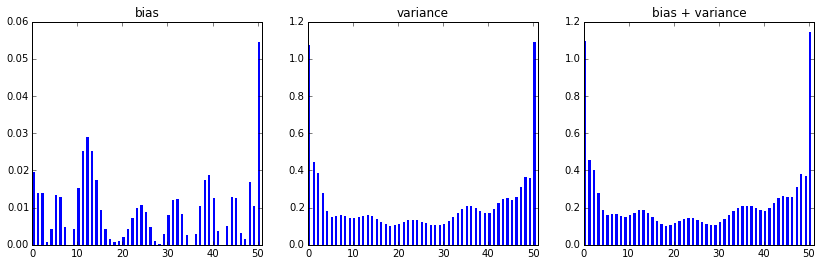

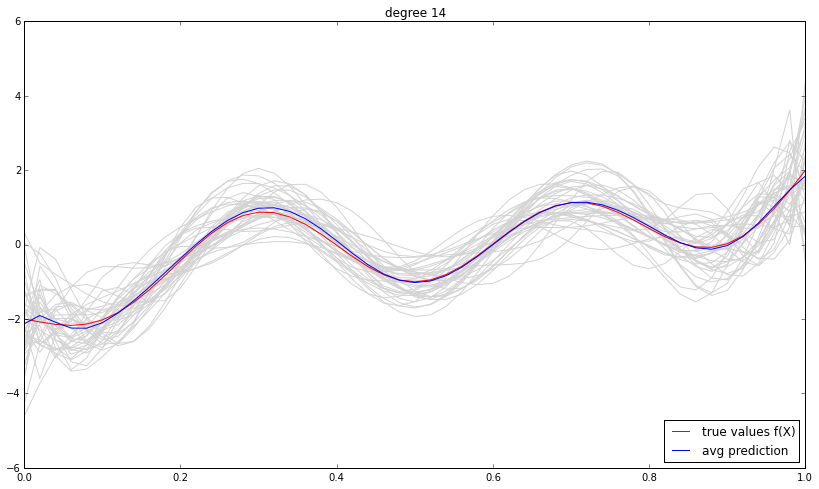

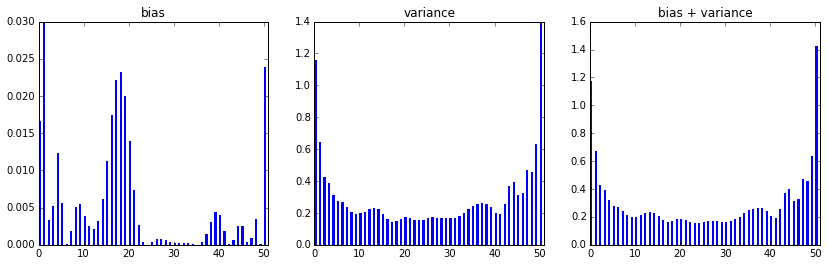

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline

def f(X): return -np.sin(5. * np.pi * X) + 2.*(2.*X - 1.)**3
# def f(X): return 3 - 2*X + X**2 - X**3

def ex51():
    degrees = [1, 5, 9, 14]
    X = np.linspace(0, 1, 51)
    Xplot = np.linspace(0, 1, 200)[:, np.newaxis]
    Xtrain = X[:, np.newaxis]
    # clone f(X) 40 times
    # randomize by adding 51*40 epsilons drawn from normal distribution with mu=0, sigma=1
    samples = np.tile(f(X), (40, 1)).T + np.random.normal(0, 1, 51*40).reshape((51, 40))
    
    pp.figure(figsize=(14, 8))
    pp.scatter(X, samples[:, 0], label="a set of training points", color="grey")
    pp.plot(Xplot, f(Xplot), label="generator function", color="grey")
    
    predictions = [] # predicted Y's for each of the models
    models = []
    for degree in degrees:
        Ys = []
        ms = []

        # I'm guessing you want 40*4 models, otherwise the exercise text doesn't make sense to me
        # please make the exercise texts clearer in regards to what the exercise is, 
        # I've spent way too much time trying to figure what you wanted us to do with the samples
        # and models
        for i in range(40):
            model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                              ('linear', LinearRegression(fit_intercept=False))])

            Y = samples[:, i]
            model.fit(Xtrain, Y)
            
            ms.append(model)
            Ys.append(model.predict(Xtrain))
            
        predictions.append(Ys)
        models.append(ms)
            
    predictions = np.array(predictions)
    print predictions.shape, "predictions"
    
    # compute average
    avg_predictions = predictions.mean(1)
    print avg_predictions.shape, "avg_predictions"
    
    # print model.named_steps['linear'].coef_, "coefficients"
    for i in range(4):
        pp.plot(Xtrain, avg_predictions[i,:], label="(avg) degree %d" % degrees[i])
    
    pp.legend(loc="lower right")
    
    # compute variance
    variance = predictions.var(1)
    print variance.shape, "variance"
    
    pp.figure(figsize=(14,4))
    pp.suptitle("variance", fontsize=18)
    for i in range(4):
        pp.subplot(1,4,i+1)
        pp.xlim(0, 51)
        pp.ylim(0, np.max(variance))
        pp.bar(np.arange(51), variance[i,:], 0.5, linewidth=0)
        pp.title("degree %d" % degrees[i])
        pp.xlabel("i")
    
    # compute bias
    pp.figure(figsize=(14,4))
    pp.suptitle("bias", fontsize=18)
    pp.xlim(0, 51)
    colors = ["r", "g", "b", "0.5"]
    for i in range(4):
        bias = (avg_predictions[i, :] - f(X))**2
        pp.bar(np.arange(51).astype(float) + 0.24*(i+1), bias, 0.24, label="degree %d" % degrees[i], alpha=0.4, color=colors[i], linewidth=0)
    pp.legend(loc="upper right")
    
    
    # (c) another visualization    
    for i in range(4):
        # all predictions + original fct + avg prediction
        pp.figure(figsize=(14,8))
        for j in range(40):
            pp.plot(Xtrain, predictions[i,j,:], color="lightgrey")
        pp.plot(Xtrain, f(Xtrain), color="red", label="true values f(X)")
        pp.plot(Xtrain, avg_predictions[i,:], color="blue", label="avg prediction")
        pp.title("degree %d" % degrees[i])
        pp.legend(loc="lower right")
        
        pp.figure(figsize=(14,4))
        # bias
        pp.subplot(1,3,1)
        pp.title("bias")
        bias = (avg_predictions[i, :] - f(X))**2
        pp.xlim(0, 51)
        pp.bar(range(51), bias, 0.5, linewidth=0)
        # variance
        pp.subplot(1,3,2)
        pp.title("variance")
        pp.xlim(0, 51)
        pp.bar(range(51), variance[i,:], 0.5, linewidth=0)
        # bias + variance
        pp.subplot(1,3,3)
        pp.title("bias + variance")
        pp.xlim(0, 51)
        pp.bar(range(51), variance[i,:]+bias, 0.5, linewidth=0)
        
    
ex51()

### (d)

$\lambda = 0$ is equivalent to not penalizing weights at all, hence the resulting graph looks the same as above

The higher the penalty-multiplier $\lambda$ gets, the smoother the prediction graphs (and hence the average-graph) become, while still adhering to the overall upwards trend of the function used to generate the training samples. As a result a well chosen $\lambda$ may be used to smoothen small-scale irregularities without sacrificing the macro-scale accuracy (~trend?) of the approximation.

If our goal was to filter the sinuscurve, $\lambda = 2$ would seem to be a good choice. $\lambda = 20$ imposes a penalty on the weights, that results in the most horizontal graph of the samples, which dips into underapproximation territory even for the macro-scale curve.

(6, 40, 51) predictions
(6, 51) avg_predictions
(6, 51) variance


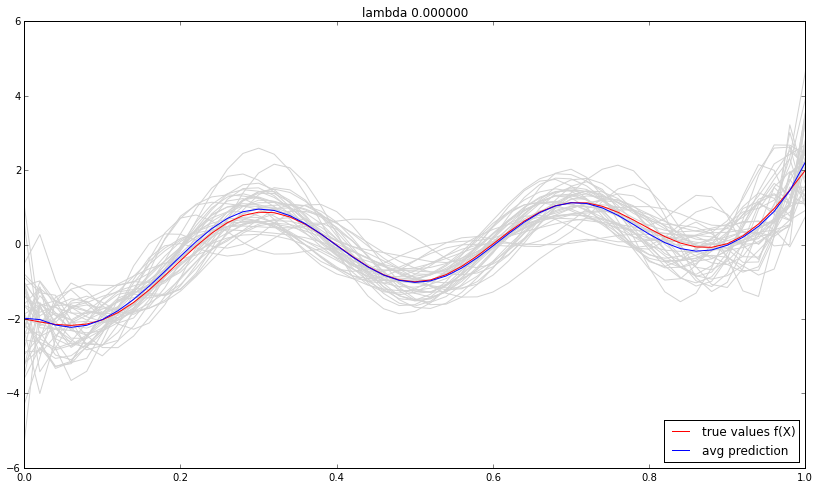

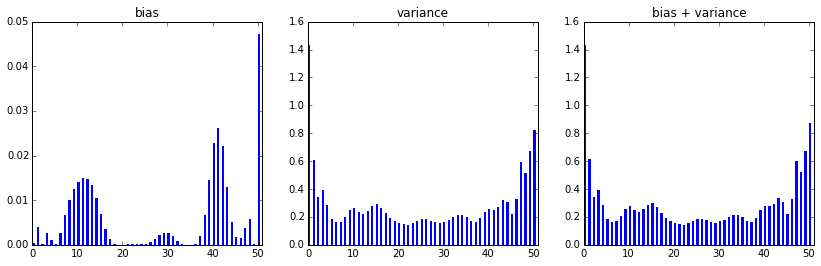

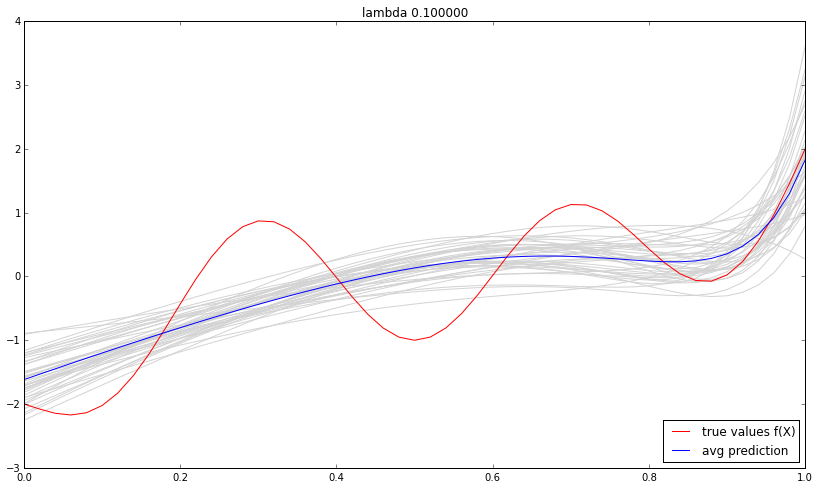

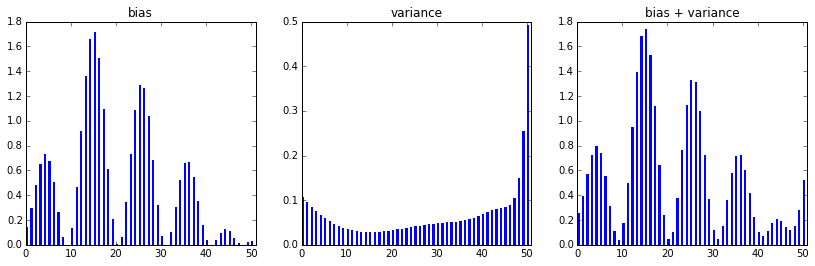

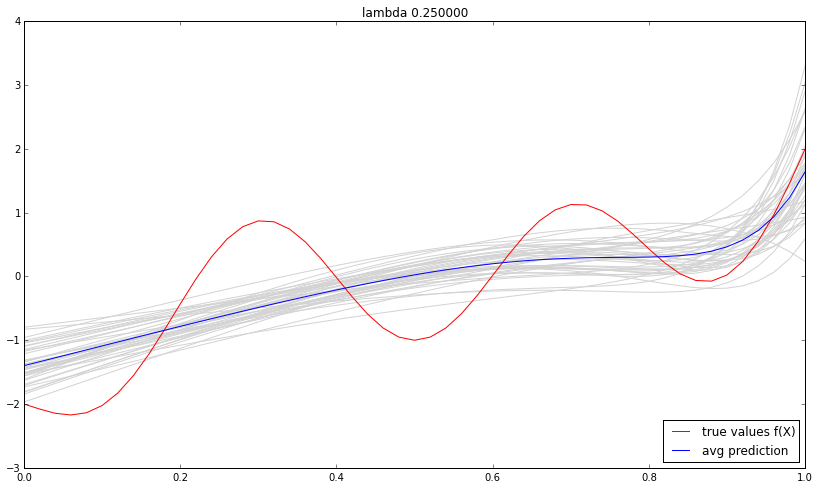

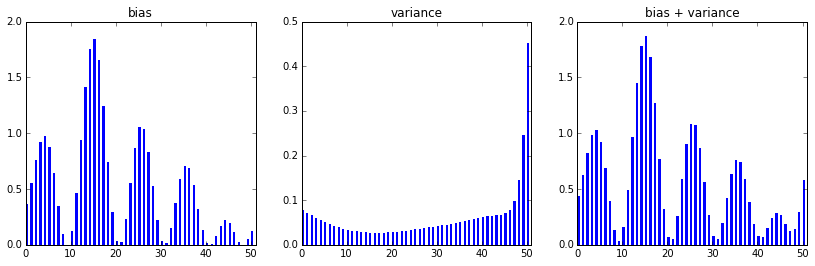

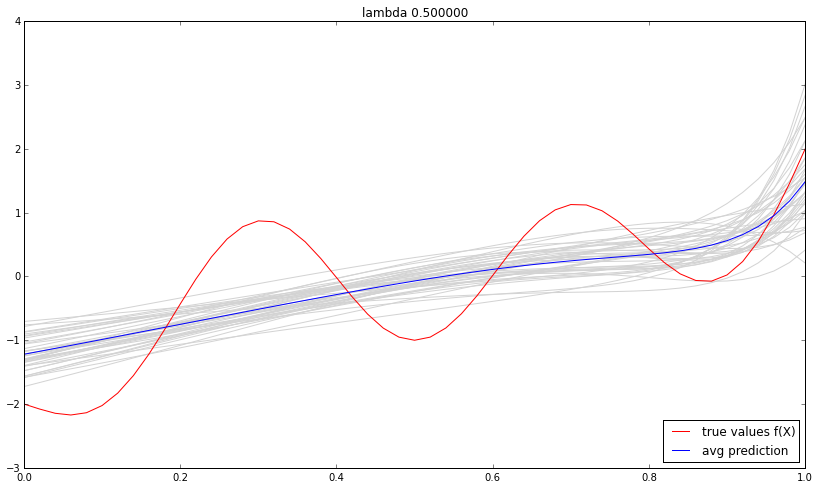

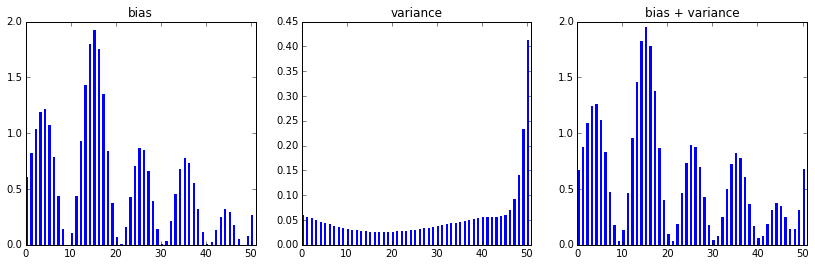

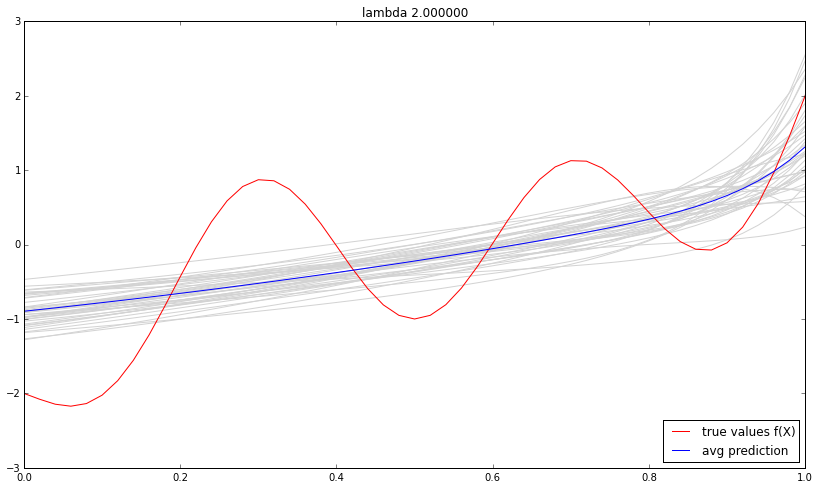

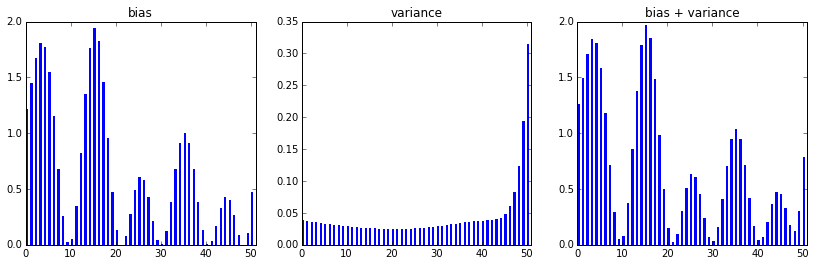

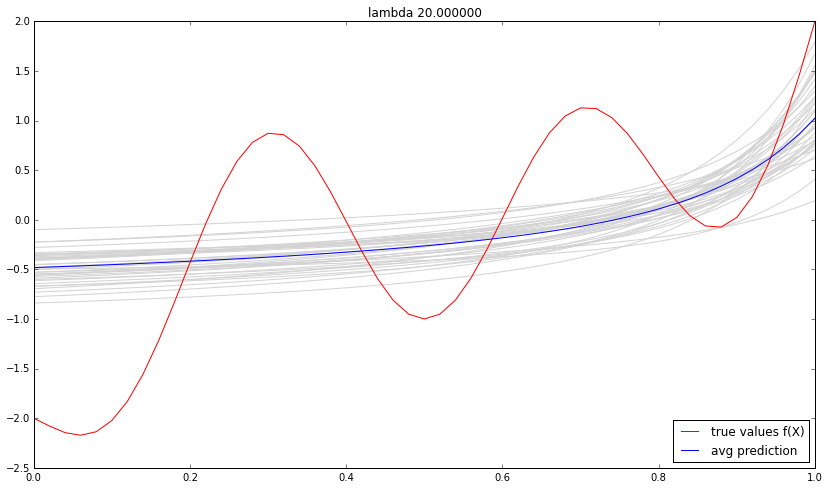

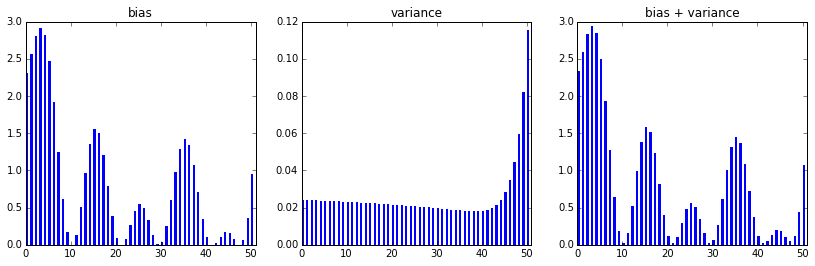

In [30]:
def ex51d():
    lambdas = [0, 0.1, 0.25, 0.5, 2, 20]
    X = np.linspace(0, 1, 51)
    Xtrain = X[:, np.newaxis]
    # clone f(X) 40 times
    # randomize by adding 51*40 epsilons drawn from normal distribution with mu=0, sigma=1
    samples = np.tile(f(X), (40, 1)).T + np.random.normal(0, 1, 51*40).reshape((51, 40))
    
    predictions = [] # predicted Y's for each of the models
    models = []
    for l in lambdas:
        Ys = []
        ms = []

        for i in range(40):
            model = Pipeline([('poly', PolynomialFeatures(degree=14)),
                              ('ridge', Ridge(alpha=l))])

            Y = samples[:, i]
            model.fit(Xtrain, Y)
            
            ms.append(model)
            Ys.append(model.predict(Xtrain))
            
        predictions.append(Ys)
        models.append(ms)
            
    predictions = np.array(predictions)
    print predictions.shape, "predictions"
    
    # compute average
    avg_predictions = predictions.mean(1)
    print avg_predictions.shape, "avg_predictions"
    
    # print model.named_steps['linear'].coef_, "coefficients"
    
    # compute variance
    variance = predictions.var(1)
    print variance.shape, "variance"
    
    # (c) another visualization    
    for i,l in enumerate(lambdas):
        # all predictions + original fct + avg prediction
        pp.figure(figsize=(14,8))
        for j in range(40):
            pp.plot(Xtrain, predictions[i,j,:], color="lightgrey")
        pp.plot(Xtrain, f(Xtrain), color="red", label="true values f(X)")
        pp.plot(Xtrain, avg_predictions[i,:], color="blue", label="avg prediction")
        pp.title("lambda %2f" % l)
        pp.legend(loc="lower right")
        
        pp.figure(figsize=(14,4))
        # bias
        pp.subplot(1,3,1)
        pp.title("bias")
        bias = (avg_predictions[i, :] - f(X))**2
        pp.xlim(0, 51)
        pp.bar(range(51), bias, 0.5, linewidth=0)
        # variance
        pp.subplot(1,3,2)
        pp.title("variance")
        pp.xlim(0, 51)
        pp.bar(range(51), variance[i,:], 0.5, linewidth=0)
        # bias + variance
        pp.subplot(1,3,3)
        pp.title("bias + variance")
        pp.xlim(0, 51)
        pp.bar(range(51), variance[i,:]+bias, 0.5, linewidth=0)
        
    
ex51d()

# 5.2

(200, 3) data
(1476, 2) validation data


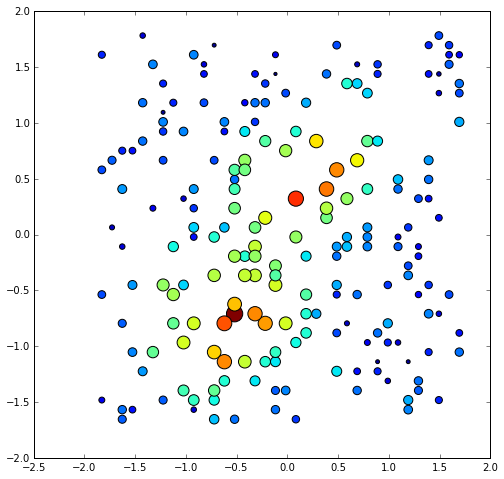

In [159]:
data = np.loadtxt(open("TrainingRidge.csv","rb"), delimiter=",", skiprows=1)
x_mean = data[:,:2].mean(0)
data[:,:2] -= x_mean
x_std = data[:,:2].std(0)
data[:,:2] /= x_std

print data.shape, "data"
pp.figure(figsize=(18,8))
pp.subplot(1,2,1)
pp.scatter(data[:,0], data[:,1], s=data[:,2]*5, c=data[:,2])

validation_data = np.loadtxt(open("ValidationRidge.csv","rb"), delimiter=",", skiprows=1)
validation_data[:,:2] -= x_mean
validation_data[:,:2] /= x_std

print validation_data.shape, "validation data"  # (x1, x2), no labels

(10, 20, 3) data partitions
3.21608040201 best lambda
483.593653135 error(best lambda)


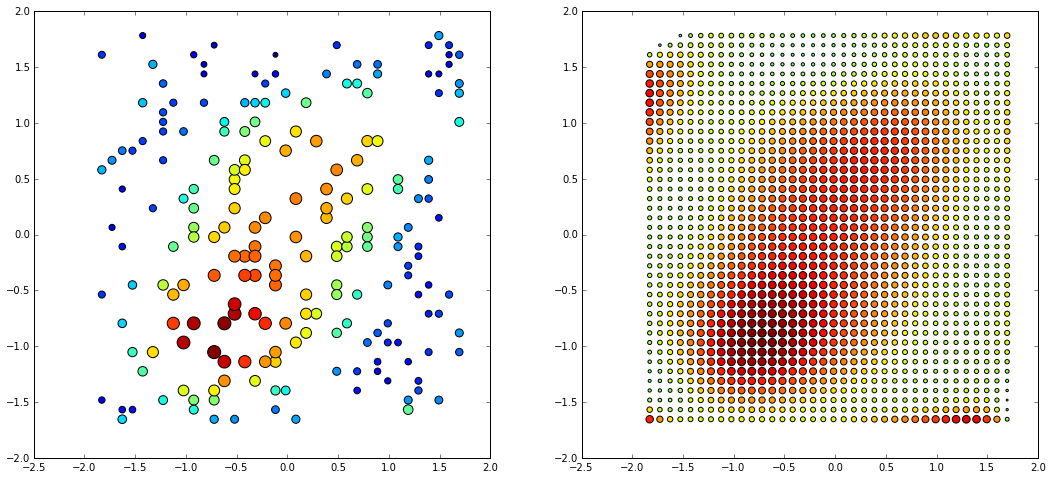

In [167]:
def ex52():
    p = 10 # number of partitions for n-fold-crossvalidation
    lambdas = np.linspace(0, 10, 200)
    errors = []
    
    data_parts = np.split(data, p)
    print np.array(data_parts).shape, "data partitions"

    for l in lambdas:
        # perform n-fold cross validation
        Es = []
        for i in range(p):
            model = Pipeline([('poly', PolynomialFeatures(degree=9)), ('ridge', Ridge(alpha=l))])

            # train on Data\Data_i
            train = list(data_parts)
            test = train.pop(i)
            train = np.vstack(train)
            model.fit(train[:,:2], train[:,2])
            
            # test on Data_i
            Y = model.predict(test[:,:2])
            E = np.sum( ((test[:,2] - Y)**2) /2. )
            Es.append(E)
        errors.append(np.mean(Es))
    
    index_best = np.argmin(errors)
    lambda_best = lambdas[index_best]
    print lambda_best, "best lambda"
    print errors[index_best], "error(best lambda)"

    model = Pipeline([('poly', PolynomialFeatures(degree=9)), ('ridge', Ridge(alpha=lambda_best))])
    model.fit(data[:,:2], data[:,2])
    pp.figure(figsize=(18,8))

    pp.subplot(1,2,1)
    Y = model.predict(data[:,:2])
    pp.scatter(data[:,0], data[:,1], s=Y*5, c=Y*5)
    
    pp.subplot(1,2,2)
    Y = model.predict(validation_data)
    pp.scatter(validation_data[:,0], validation_data[:,1], s=Y*2, c=Y*2)
    
    np.savetxt("validation_labels.txt", Y, delimiter=",", newline=",")
    
ex52()

In [179]:
import time

def ex52c():
    ps = [5, 10, 20]
    lambdas = np.linspace(0, 10, 200)
    errors_general = []
    times = []
    
    for j,p in enumerate(ps):
        time_start = time.time()

        data_parts = np.split(data, p)
        errors = []
        
        training_set = list(data_parts)
        validation_set = training_set.pop(j)
        
        for l in lambdas:
            # perform n-fold cross validation
            Es = []
            for i in range(p-1):
                model = Pipeline([('poly', PolynomialFeatures(degree=9)), ('ridge', Ridge(alpha=l))])

                # train on Data\Data_i
                train = list(training_set)
                test = train.pop(i)
                train = np.vstack(train)
                model.fit(train[:,:2], train[:,2])

                # test on Data_i
                Y = model.predict(test[:,:2])
                E = np.sum( ((test[:,2] - Y)**2) /2. )
                Es.append(E)
            errors.append(np.mean(Es))

        index_best = np.argmin(errors)
        lambda_best = lambdas[index_best]
        print lambda_best, "best lambda"
        print errors[index_best], "error(best lambda)"

        model = Pipeline([('poly', PolynomialFeatures(degree=9)), ('ridge', Ridge(alpha=lambda_best))])
        train = np.vstack(training_set)
        model.fit(train[:,:2], train[:,2])

        Y = model.predict(validation_set[:,:2])
        E = np.mean( ((validation_set[:,2] - Y)**2) /2. )
        print E, "error general for validation_set with p =", p
        errors_general.append(E)
        time_diff = time.time() - time_start
        print time_diff, "computation time in seconds"
        times.append(time_diff)
        print
        
    print np.mean(errors_general), "overall estimated general error"
    print np.sum(times), "overall computation time"
        
ex52c()

1.3567839196 best lambda
762.948547392 error(best lambda)
141.12565727 error general for validation_set with p = 5
4.76674294472 computation time in seconds

2.66331658291 best lambda
458.003835692 error(best lambda)
19.6632851602 error general for validation_set with p = 10
11.3503680229 computation time in seconds

5.1256281407 best lambda
230.036422721 error(best lambda)
24.6109941542 error general for validation_set with p = 20
24.7287881374 computation time in seconds

61.7999788615 overall estimated general error
40.8458991051 overall computation time
